In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import pickle 
import math
import os.path
from os import path
from tqdm import tqdm

In [33]:
gesture_list = [
        "NormalWalking",
        "TapOuward",
        "TapInFrontOfTheOtherFoot",
        "TapInward",
        "BigStep", 
        "SmallStep",
        "ToeTapBehind",
        "ToeTapInFront",
        "TapWithHeel",
        "TapWithFootRotatedOutwards",
        "TapWithFootRotatedInwards",
        "Click",
        "KickInward",
        "KickOutward",
        "KickForward",
        "LiftInFront",
        "BendingBehind",
        "MidairRotationInwards",
        "MidairRotationOutwards",
        "DraggingInFront",
        "DraggingBehind",
        "Delay",
        "Rush"
    ]

In [4]:
new_gesture_list = [
    "normal",
    "tap-out",
    "tap-across",
    "tap-in",
    "big-step", 
    "small-step",
    "tap-behind",
    "tap-ahead",
    "heel",
    "tap-rotate-out",
    "tap-rotate-in",
    "brush",
    "kick-in",
    "kick-out",
    "kick-ahead",
    "high-step",
    "bend-behind",
    "swing-in",
    "swing-out",
    "drag-ahead",
    "drag-behind",
    "slow-step",
    "fast-step"
]

In [11]:
# read data
df = pd.read_excel("../data/Post-Questionnaire (Responses).xlsx")

In [10]:
!python3.9 -m pip install openpyxl

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 1.0 MB/s eta 0:00:00a 0:00:01m
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near fut

In [12]:
# initiate result data container
difficulty_by_gesture = dict()
disruption_by_gesture = dict()
social_by_gesture = dict()
for i in gesture_list:
  difficulty_by_gesture[i] = []
  disruption_by_gesture[i] = []
  social_by_gesture[i] = []

In [13]:
# parse data into containers
from collections import OrderedDict
for i in range(1, len(df.iloc[:, 0])):
  if df.iloc[i, 2] in gesture_list:
    difficulty_by_gesture[df.iloc[i, 2]].append(int(df.iloc[i, 3]))
    disruption_by_gesture[df.iloc[i, 2]].append(int(df.iloc[i, 4]))
    social_by_gesture[df.iloc[i, 2]].append(int(df.iloc[i, 5]))
difficulty_by_gesture = OrderedDict(reversed(list(difficulty_by_gesture.items())))
disruption_by_gesture = OrderedDict(reversed(list(disruption_by_gesture.items())))
social_by_gesture = OrderedDict(reversed(list(social_by_gesture.items())))

In [14]:
def ci(data):
    # Calculate mean and sample standard deviation
    mean = np.mean(data)
    std = np.std(data, ddof=1)  # ddof=1 for sample standard deviation

    # Number of observations
    n = len(data)

    # Degrees of freedom
    df = n - 1

    # For a 90% CI, and assuming a large sample size, the critical t-value can be approximated
    # Here, we're assuming a two-tailed test, so we'll use z since t approaches z for large n
    # For 90% CI in a two-tailed test, the z-value is approximately 1.645 (for large n)
    # For smaller samples, you'd use a t-table or other method to find the exact critical value
    z = 1.960

    # Calculate the margin of error
    margin_error = z * (std / np.sqrt(n))

    # Calculate the confidence interval
    ci_lower = mean - margin_error
    ci_upper = mean + margin_error
    return margin_error


(b) Social Acceptability
(c) Walking Compatibility


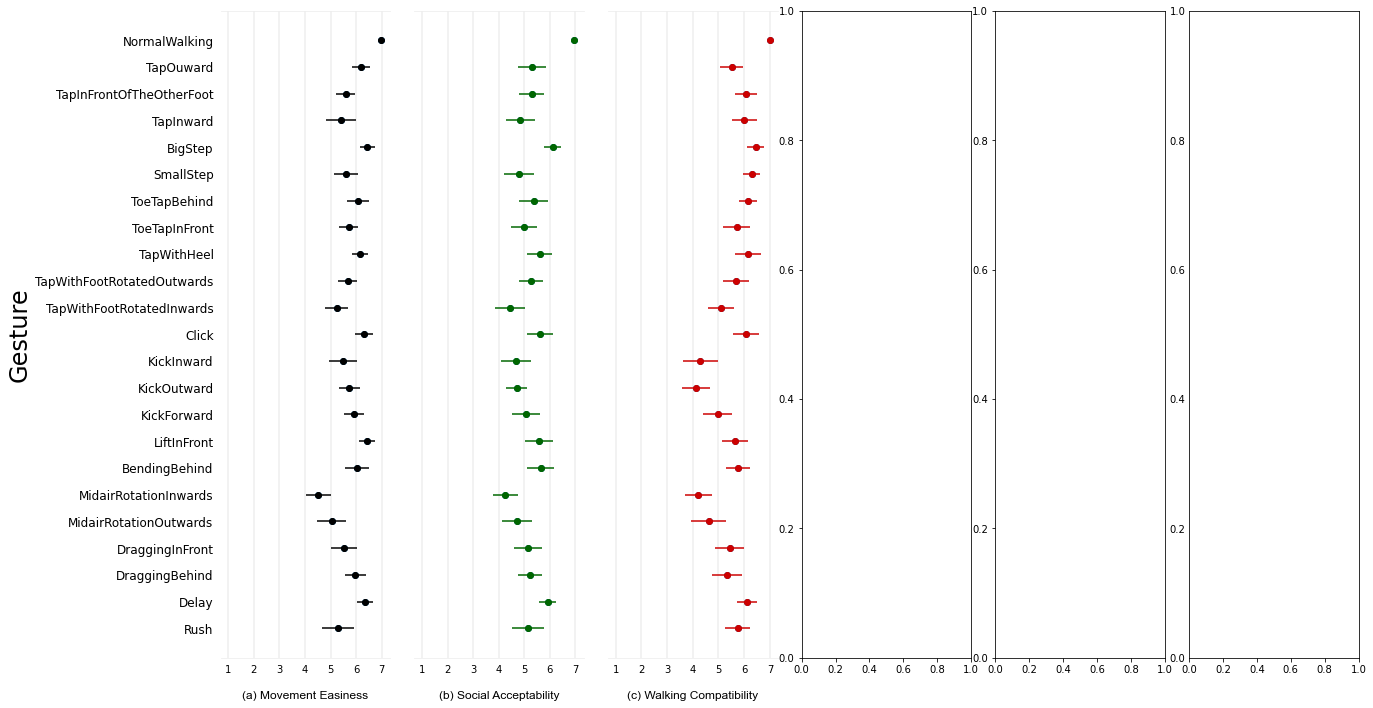

In [16]:
import matplotlib.pyplot as plt
import time
def subplot_subjective_score(names, scores, error, datacolor, subtitle, pole_min, pole_max, xrange, ax, isleftmost):
    #hfont = {'fontname':'Helvetica'}
    hfont = {'fontname':'Arial'}
    for i in xrange:
      ax.axvline(x=i, color='#EEEEEE', zorder=0)
    
    # setting xticks to be by integer 
    ax.set_xticks(xrange)

    #ax.set_xticklabels(names)

    #ax.set_xlim([0.5, 7.5])
  
    # setting margin between yticks

    #ax.yaxis.set_tick_params(labelsize=20)
    if isleftmost:
      ax.set_yticks(range(len(names)))
      ax.set_yticklabels(names, size = 12)
      ax.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=True, labelbottom=True)
    else: 
      print(subtitle)
      ax.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=True)
    # plt.ylabel("X-axis", labelpad=0)
    # Control the scale and distance of the y-ticks
    plt.gca().yaxis.set_tick_params(length=0, width=0, direction='out')
    #plt.gca().xaxis.set_tick_params(length=0, width=0, direction='out')

    ax.errorbar(scores, range(len(names)), xerr=error, fmt='o', color=datacolor)
    ax.scatter(scores, range(len(names)))
    # remove left and right border of plot
    ax.spines['right'].set_visible(False)

    ax.spines['left'].set_visible(False)

    # set top and bottom border color of plot to grey
    ax.spines['top'].set_color('#EEEEEE')
    ax.spines['bottom'].set_color('#EEEEEE')
    #ax.text(7, 23.5, pole_max, size = 8, ha = 'center')
    #ax.text(1, 23.5, pole_min, size = 8, ha = 'center')
    ax.set_xlabel(subtitle, labelpad=16, size = 12, **hfont)
    if isleftmost:
      ax.set_ylabel("Gesture", size = 24)
    # ax.set_title("Error Rate vs. Score")
    # plt.colorbar()
    plt.rcParams['figure.figsize'] = [16, 9]

fig, ax = plt.subplots(1, 6)
fig.tight_layout(pad = -1)
subplot_subjective_score(names = difficulty_by_gesture.keys(), 
                      scores = [sum(difficulty_by_gesture[i]) / len(difficulty_by_gesture[i]) for i in difficulty_by_gesture], 
                      error = [ci(difficulty_by_gesture[i]) for i in difficulty_by_gesture],
                      datacolor = "black", subtitle = "(a) Movement Easiness", pole_min = "very difficult", pole_max = "very easy", xrange = range(1, 8), ax = ax[0], isleftmost = True)
subplot_subjective_score(names = social_by_gesture.keys(), 
                      scores = [sum(social_by_gesture[i]) / len(social_by_gesture[i]) for i in social_by_gesture], 
                      error = [ci(social_by_gesture[i]) for i in social_by_gesture],
                      datacolor = "#006600", subtitle = "(b) Social Acceptability", pole_min = "very\nuncomfortable", pole_max = "very\ncomfortable", xrange = range(1, 8), ax = ax[1], isleftmost = False)
subplot_subjective_score(names = disruption_by_gesture.keys(), 
                      scores = [sum(disruption_by_gesture[i]) / len(disruption_by_gesture[i]) for i in disruption_by_gesture], 
                      error = [ci(disruption_by_gesture[i]) for i in disruption_by_gesture],
                      datacolor = "#cc0000", subtitle = "(c) Walking Compatibility", pole_min = "very much", pole_max = "very little", xrange = range(1, 8), ax = ax[2], isleftmost = False)
# subplot_subjective_score(names = difficulty_by_gesture.keys(), 
#                       scores = [sum(difficulty_by_gesture[i]) / len(difficulty_by_gesture[i]) for i in difficulty_by_gesture], 
#                       error = [np.std(difficulty_by_gesture[i]) / np.sqrt(len(difficulty_by_gesture[i])) for i in difficulty_by_gesture],
#                       datacolor = "black", subtitle = "(a) Movement Easiness", pole_min = "very difficult", pole_max = "very easy", xrange = range(1, 8), ax = ax[0], isleftmost = True)
# subplot_subjective_score(names = social_by_gesture.keys(), 
#                       scores = [sum(social_by_gesture[i]) / len(social_by_gesture[i]) for i in social_by_gesture], 
#                       error = [np.std(social_by_gesture[i]) / np.sqrt(len(social_by_gesture[i])) for i in social_by_gesture],
#                       datacolor = "#006600", subtitle = "(b) Social Acceptability", pole_min = "very\nuncomfortable", pole_max = "very\ncomfortable", xrange = range(1, 8), ax = ax[1], isleftmost = False)
# subplot_subjective_score(names = disruption_by_gesture.keys(), 
#                       scores = [sum(disruption_by_gesture[i]) / len(disruption_by_gesture[i]) for i in disruption_by_gesture], 
#                       error = [np.std(disruption_by_gesture[i]) / np.sqrt(len(disruption_by_gesture[i])) for i in disruption_by_gesture],
#                       datacolor = "#cc0000", subtitle = "(c) Walking Compatibility", pole_min = "very much", pole_max = "very little", xrange = range(1, 8), ax = ax[2], isleftmost = False)
# subplot_subjective_score(names = duration_all.keys(), 
#                       scores = [sum(duration_all[i]) / len(duration_all[i]) for i in duration_all], 
#                       error = [np.std(duration_all[i]) / np.sqrt(len(duration_all[i])) for i in duration_all],
#                       datacolor = "#4c72b0", subtitle = "(d) Overall Duration (s)", pole_min = "", pole_max = "", xrange = range(6, 17, 2), ax = ax[3], isleftmost = False)
# subplot_subjective_score(names = duration_t1.keys(), 
#                       scores = [sum(duration_t1[i]) / len(duration_t1[i]) for i in duration_t1], 
#                       error = [np.std(duration_t1[i]) / np.sqrt(len(duration_t1[i])) for i in duration_t1],
#                       datacolor = "#4c72b0", subtitle = "(e) Trial 1 Duration (s)", pole_min = "", pole_max = "", xrange = range(2, 8), ax = ax[4], isleftmost = False)
# subplot_subjective_score(names = duration_t2.keys(), 
#                       scores = [sum(duration_t2[i]) / len(duration_t2[i]) for i in duration_t2], 
#                       error = [np.std(duration_t2[i]) / np.sqrt(len(duration_t2[i])) for i in duration_t2],
#                       datacolor = "#4c72b0", subtitle = "(f) Trial 2 Duration (s)", pole_min = "", pole_max = "", xrange = range(2, 8), ax = ax[5], isleftmost = False)

#plt.figure(facecolor='white')
#plt.show()
timestr = time.strftime("%Y-%m-%d %H-%M-%S")
plt.savefig("Subjective Score " + timestr + ".png", bbox_inches="tight")

In [17]:

difficulty_scores = [sum(difficulty_by_gesture[i]) / len(difficulty_by_gesture[i]) for i in difficulty_by_gesture]
social_scores = [sum(social_by_gesture[i]) / len(social_by_gesture[i]) for i in social_by_gesture]
disruption_scores = [sum(disruption_by_gesture[i]) / len(disruption_by_gesture[i]) for i in disruption_by_gesture]

In [18]:
data = np.stack((np.array(difficulty_scores), np.array(social_scores), np.array(disruption_scores)), axis=1)
data

array([[5.2962963 , 5.14814815, 5.74074074],
       [6.35714286, 5.92857143, 6.10714286],
       [5.96296296, 5.22222222, 5.33333333],
       [5.51851852, 5.14814815, 5.44444444],
       [5.03846154, 4.73076923, 4.61538462],
       [4.52173913, 4.26086957, 4.2173913 ],
       [6.03571429, 5.64285714, 5.75      ],
       [6.42307692, 5.57692308, 5.65384615],
       [5.92592593, 5.07407407, 4.96296296],
       [5.74074074, 4.7037037 , 4.11111111],
       [5.48148148, 4.66666667, 4.2962963 ],
       [6.30769231, 5.61538462, 6.07692308],
       [5.23333333, 4.43333333, 5.1       ],
       [5.66666667, 5.25925926, 5.66666667],
       [6.16      , 5.6       , 6.16      ],
       [5.7037037 , 5.        , 5.7037037 ],
       [6.07407407, 5.37037037, 6.14814815],
       [5.60714286, 4.78571429, 6.28571429],
       [6.44444444, 6.11111111, 6.44444444],
       [5.40740741, 4.85185185, 6.        ],
       [5.59259259, 5.2962963 , 6.07407407],
       [6.18518519, 5.2962963 , 5.51851852],
       [6.

In [19]:
# k means clustering by difficulty_by_gesture

# Importing the libraries   
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# compute kmeans based on difficulty_by_gesture
KMeans = KMeans(n_clusters = 4, random_state = 0).fit(data)
labels = KMeans.labels_
centroids = KMeans.cluster_centers_
print(labels)
print(centroids)

[1 3 3 1 0 0 3 3 0 0 0 3 0 1 3 1 3 1 2 1 1 3 2]
[[5.32361369 4.64490276 4.55052438]
 [5.54176115 5.06991686 5.84504913]
 [6.7037037  6.53703704 6.72222222]
 [6.18823107 5.53157814 5.84348901]]


/usr/local/lib/python3.9/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


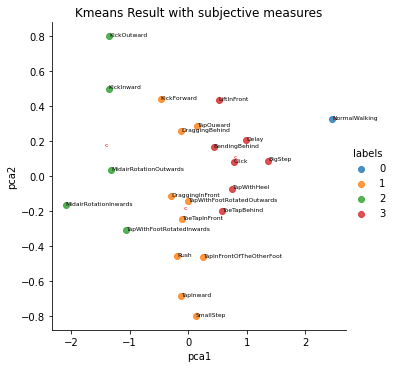

In [39]:
# visualize kmeans result
# input: kmeans result
# output: kmeans result visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import os

# kmeans
kmeans = KMeans(n_clusters = 4, n_init = 10, max_iter = 300, random_state = 0).fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# PCA
pca = PCA(n_components=2)
pca.fit(data)
data_pca = pca.transform(data)
data_center = pca.transform(centroids)
data_pca = pd.DataFrame(data_pca)
data_pca.columns = ['pca1', 'pca2']
data_pca['labels'] = labels

# plot
sns.lmplot(x='pca1', y='pca2', data=data_pca, hue='labels', fit_reg=False, legend=True, legend_out=True)

# add text to plot at 0, 0
for i in range(len(gesture_list[::-1])):
    plt.text(data_pca['pca1'][i], data_pca['pca2'][i], gesture_list[::-1][i], fontsize=6, color='black')
for i in range(len(centroids)):
    plt.text(data_center[i][0], data_center[i][1], "c", fontsize=6, color='red')
plt.title('Kmeans Result with subjective measures')
plt.savefig('kmeans_result.png')


In [20]:
# clustered gesture list
clustered_gesture_list = [
    "NormalWalking",# 0

    "Delay",# 3
    "BigStep",# 3
    "ToeTapBehind",# 3
    "TapWithHeel",# 3
    "Click",# 3
    "LiftInFront",# 3
    "BendingBehind",# 3

    "TapOuward",# 1
    "TapInFrontOfTheOtherFoot",# 1
    "TapInward",# 1
    "SmallStep",# 1
    "ToeTapInFront",# 1
    "KickForward",# 1
    "DraggingInFront",# 1
    "DraggingBehind",# 1
    "Rush",# 1
    "TapWithFootRotatedOutwards",# 1
    
    "TapWithFootRotatedInwards",# 2
    "KickInward",# 2
    "KickOutward",# 2
    "MidairRotationInwards",# 2
    "MidairRotationOutwards",# 2
     
    ]

In [54]:
# sort gesture_list based on values in labels
new_gesture_order = dict()
gesture_code = dict()
easiness_scores = dict()
scores = [sum(difficulty_by_gesture[i]) / len(difficulty_by_gesture[i]) for i in difficulty_by_gesture]
for i in range(len(labels)):
  new_gesture_order[gesture_list[::-1][i]] = labels[i]
  gesture_code[gesture_list[i]] = i
  easiness_scores[gesture_list[i]] = scores[i]
def moveEasiness(e):
  return easiness_scores[e]
def myCluster(e):
  return new_gesture_order[e]
clustered_gesture_list = sorted(gesture_list, key=lambda x: (moveEasiness(x), myCluster(x)))

# get the new order
new_order = [gesture_code[clustered_gesture_list[i]] for i in range(len(clustered_gesture_list))]

new_order

[5,
 4,
 12,
 0,
 19,
 10,
 3,
 20,
 17,
 13,
 15,
 9,
 8,
 2,
 6,
 16,
 14,
 21,
 11,
 1,
 7,
 18,
 22]

(b) Social Acceptability
(c) Walking Compatibility


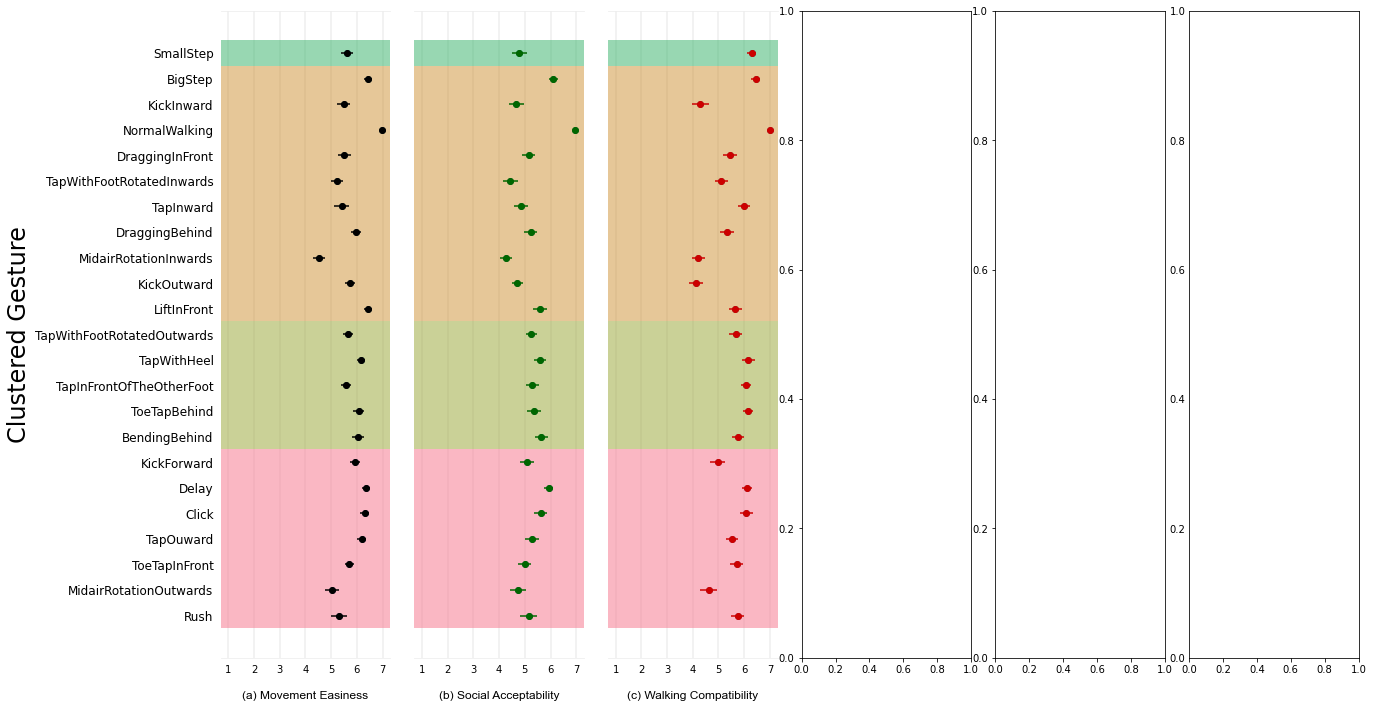

In [55]:
# plot barplots with clustered gesture
import matplotlib.pyplot as plt
import time
import seaborn as sns
def subplot_clustered_subjective_score(names, scores, error, datacolor, subtitle, pole_min, pole_max, xrange, ax, isleftmost):
    #hfont = {'fontname':'Helvetica'}
    hfont = {'fontname':'Arial'}
    for i in xrange:
      ax.axvline(x=i, color='#EEEEEE', zorder=0)
    scores = [scores[::-1][i] for i in new_order]
    error = [error[::-1][i] for i in new_order]
    # setting xticks to be by integer 
    ax.set_xticks(xrange)

    #ax.set_xticklabels(names)

    #ax.set_xlim([0.5, 7.5])
  
    # setting margin between yticks

    #ax.yaxis.set_tick_params(labelsize=20)
    if isleftmost:
      ax.set_yticks(range(len(names)))
      ax.set_yticklabels(names, size = 12)
      ax.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=True, labelbottom=True)
    else: 
      print(subtitle)
      ax.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=True)
    # plt.ylabel("X-axis", labelpad=0)
    # Control the scale and distance of the y-ticks
    plt.gca().yaxis.set_tick_params(length=0, width=0, direction='out')
    #plt.gca().xaxis.set_tick_params(length=0, width=0, direction='out')

    ax.errorbar(scores[::-1], range(len(names)), xerr=error[::-1], fmt='o', color=datacolor)
    ax.scatter(scores[::-1], range(len(names)))
    # remove left and right border of plot
    ax.spines['right'].set_visible(False)

    ax.spines['left'].set_visible(False)

    # set top and bottom border color of plot to grey
    ax.spines['top'].set_color('#EEEEEE')
    ax.spines['bottom'].set_color('#EEEEEE')
    #ax.text(7, 23.5, pole_max, size = 8, ha = 'center')
    #ax.text(1, 23.5, pole_min, size = 8, ha = 'center')
    ax.set_xlabel(subtitle, labelpad=16, size = 12, **hfont)
    if isleftmost:
      ax.set_ylabel("Clustered Gesture", size = 24)
    # ax.set_title("Error Rate vs. Score")
    # plt.colorbar()
    plt.rcParams['figure.figsize'] = [16, 9]

# plot the same barplot plot but by kmeans clustering
fig, ax = plt.subplots(1, 6)
fig.tight_layout(pad = -1)
subplot_clustered_subjective_score(names = clustered_gesture_list[::-1], 
                      scores = [sum(difficulty_by_gesture[i]) / len(difficulty_by_gesture[i]) for i in difficulty_by_gesture], 
                      error = [np.std(difficulty_by_gesture[i]) / np.sqrt(len(difficulty_by_gesture[i])) for i in difficulty_by_gesture],
                      datacolor = "black", subtitle = "(a) Movement Easiness", pole_min = "very difficult", pole_max = "very easy", xrange = range(1, 8), ax = ax[0], isleftmost = True)
subplot_clustered_subjective_score(names = clustered_gesture_list[::-1], 
                      scores = [sum(social_by_gesture[i]) / len(social_by_gesture[i]) for i in social_by_gesture], 
                      error = [np.std(social_by_gesture[i]) / np.sqrt(len(social_by_gesture[i])) for i in social_by_gesture],
                      datacolor = "#006600", subtitle = "(b) Social Acceptability", pole_min = "very\nuncomfortable", pole_max = "very\ncomfortable", xrange = range(1, 8), ax = ax[1], isleftmost = False)
subplot_clustered_subjective_score(names = clustered_gesture_list[::-1], 
                      scores = [sum(disruption_by_gesture[i]) / len(disruption_by_gesture[i]) for i in disruption_by_gesture], 
                      error = [np.std(disruption_by_gesture[i]) / np.sqrt(len(disruption_by_gesture[i])) for i in disruption_by_gesture],
                      datacolor = "#cc0000", subtitle = "(c) Walking Compatibility", pole_min = "very much", pole_max = "very little", xrange = range(1, 8), ax = ax[2], isleftmost = False)
# subplot_subjective_score(names = duration_all.keys(), 
#                       scores = [sum(duration_all[i]) / len(duration_all[i]) for i in duration_all], 
#                       error = [np.std(duration_all[i]) / np.sqrt(len(duration_all[i])) for i in duration_all],
#                       datacolor = "#4c72b0", subtitle = "(d) Overall Duration (s)", pole_min = "", pole_max = "", xrange = range(6, 17, 2), ax = ax[3], isleftmost = False)
# subplot_subjective_score(names = duration_t1.keys(), 
#                       scores = [sum(duration_t1[i]) / len(duration_t1[i]) for i in duration_t1], 
#                       error = [np.std(duration_t1[i]) / np.sqrt(len(duration_t1[i])) for i in duration_t1],
#                       datacolor = "#4c72b0", subtitle = "(e) Trial 1 Duration (s)", pole_min = "", pole_max = "", xrange = range(2, 8), ax = ax[4], isleftmost = False)
# subplot_subjective_score(names = duration_t2.keys(), 
#                       scores = [sum(duration_t2[i]) / len(duration_t2[i]) for i in duration_t2], 
#                       error = [np.std(duration_t2[i]) / np.sqrt(len(duration_t2[i])) for i in duration_t2],
#                       datacolor = "#4c72b0", subtitle = "(f) Trial 2 Duration (s)", pole_min = "", pole_max = "", xrange = range(2, 8), ax = ax[5], isleftmost = False)

#plt.figure(facecolor='white')

cmap = sns.color_palette("husl", 8)
# for i in range(0, 3):
#     ax[i].axhspan(-0.5, 6.5, facecolor=cmap[0], alpha=0.5)
#     ax[i].axhspan(6.5, 11.5, facecolor=cmap[2], alpha=0.5)
#     ax[i].axhspan(11.5, 21.5, facecolor=cmap[1], alpha=0.5)
#     ax[i].axhspan(21.5, 22.5, facecolor=cmap[3], alpha=0.5)
    #ax[i].axvspan(3, 4, facecolor='b', alpha=0.5)
#plt.show()
timestr = time.strftime("%Y-%m-%d %H-%M-%S")
plt.savefig("Clustered Subjective Score " + timestr + ".png", bbox_inches="tight")

In [25]:
!python3.9 -m pip install seaborn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.1 MB/s eta 0:00:00a 0:00:01m
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
